In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [9]:
titanic=pd.read_csv('titanic.csv')

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
titanic=titanic.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)

In [15]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Sex','Embarked']
for val in list1:
    titanic[val]=le.fit_transform(titanic[val].astype(str))

In [17]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [18]:
titanic.Survived.unique()

array([0, 1], dtype=int64)

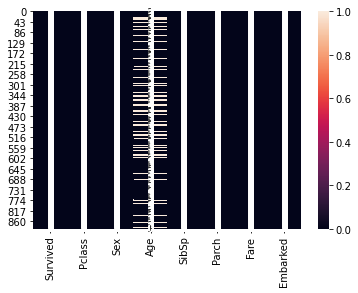

In [19]:
sns.heatmap(titanic.isnull(),annot=True)

In [20]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [21]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
titanic['Age']=imp.fit_transform(titanic['Age'].values.reshape(-1,1))

In [22]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


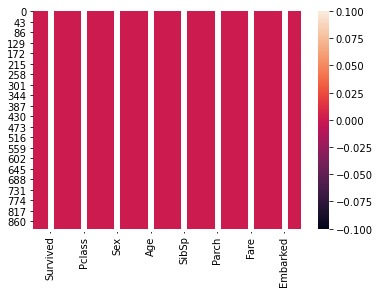

In [23]:
sns.heatmap(titanic.isnull(),annot=True)

In [24]:
titanic.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.246689
dtype: float64

In [25]:
for col in titanic.columns:
    if titanic.skew().loc[col]>0.55:
        titanic[col]=np.log1p(titanic[col])

In [26]:
titanic.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       1.661245
Parch       1.675439
Fare        0.394928
Embarked   -1.246689
dtype: float64

In [27]:
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,0.029430,0.114999,0.329862,-0.163517
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.022021,-0.002530,-0.661022,0.157112
Sex,-0.543351,0.131900,1.000000,0.084153,-0.165302,-0.256638,-0.263276,0.104057
Age,-0.069809,-0.331339,0.084153,1.000000,-0.231168,-0.231807,0.102485,-0.022239
SibSp,0.029430,0.022021,-0.165302,-0.231168,1.000000,0.473259,0.375371,0.036131
Parch,0.114999,-0.002530,-0.256638,-0.231807,0.473259,1.000000,0.363261,0.025070
Fare,0.329862,-0.661022,-0.263276,0.102485,0.375371,0.363261,1.000000,-0.197567
Embarked,-0.163517,0.157112,0.104057,-0.022239,0.036131,0.025070,-0.197567,1.000000


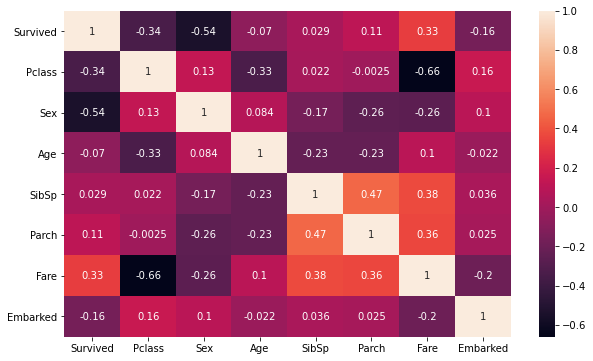

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(titanic.corr(),annot=True)

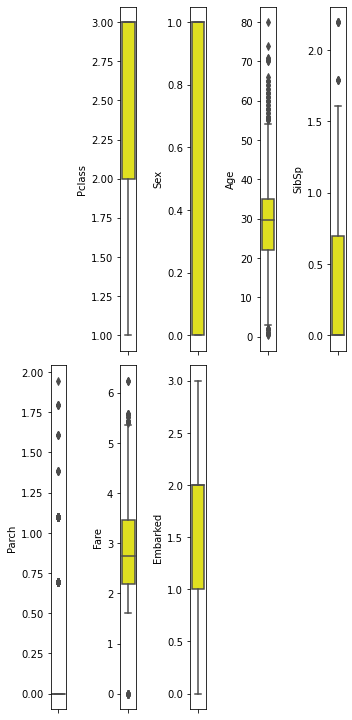

In [29]:
col=titanic.columns.values
ncol=5
nrow=5
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(col)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(titanic[col[i]],color='yellow',orient='v')
    plt.tight_layout()

In [30]:
from scipy.stats import zscore
z_score=abs(zscore(titanic))
print(titanic.shape)
nic=titanic.loc[(z_score<3).all(axis=1)]
print(nic.shape)

(891, 8)
(844, 8)


In [31]:
nic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,0.693147,0.000000,2.110213,2
1,1,1,0,38.000000,0.693147,0.000000,4.280593,0
2,1,3,0,26.000000,0.000000,0.000000,2.188856,2
3,1,1,0,35.000000,0.693147,0.000000,3.990834,2
4,0,3,1,35.000000,0.000000,0.000000,2.202765,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0.000000,0.000000,2.639057,2
887,1,1,0,19.000000,0.000000,0.000000,3.433987,2
888,0,3,0,29.699118,0.693147,1.098612,3.196630,2
889,1,1,1,26.000000,0.000000,0.000000,3.433987,0


In [32]:
nic=pd.DataFrame(data=nic)

In [33]:
x=nic.iloc[:,1:-1]

In [34]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.000000,0.693147,0.000000,2.110213
1,1,0,38.000000,0.693147,0.000000,4.280593
2,3,0,26.000000,0.000000,0.000000,2.188856
3,1,0,35.000000,0.693147,0.000000,3.990834
4,3,1,35.000000,0.000000,0.000000,2.202765
...,...,...,...,...,...,...
886,2,1,27.000000,0.000000,0.000000,2.639057
887,1,0,19.000000,0.000000,0.000000,3.433987
888,3,0,29.699118,0.693147,1.098612,3.196630
889,1,1,26.000000,0.000000,0.000000,3.433987


In [35]:
x.shape

(844, 6)

In [36]:
y=nic.iloc[:,0]

In [37]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 844, dtype: int64

In [38]:
y.shape

(844,)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=50)

In [40]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred=lr.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7913385826771654
[[133  24]
 [ 29  68]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       157
           1       0.74      0.70      0.72        97

    accuracy                           0.79       254
   macro avg       0.78      0.77      0.78       254
weighted avg       0.79      0.79      0.79       254



In [41]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7677165354330708
[[135  22]
 [ 37  60]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       157
           1       0.73      0.62      0.67        97

    accuracy                           0.77       254
   macro avg       0.76      0.74      0.75       254
weighted avg       0.76      0.77      0.76       254



In [42]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
mnb.score(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.7283464566929134
[[140  17]
 [ 52  45]]
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       157
           1       0.73      0.46      0.57        97

    accuracy                           0.73       254
   macro avg       0.73      0.68      0.68       254
weighted avg       0.73      0.73      0.71       254



In [43]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8385826771653543
[[142  15]
 [ 26  71]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       157
           1       0.83      0.73      0.78        97

    accuracy                           0.84       254
   macro avg       0.84      0.82      0.82       254
weighted avg       0.84      0.84      0.84       254



In [44]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7519685039370079
[[127  30]
 [ 33  64]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       157
           1       0.68      0.66      0.67        97

    accuracy                           0.75       254
   macro avg       0.74      0.73      0.74       254
weighted avg       0.75      0.75      0.75       254



In [45]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6692913385826772
[[146  11]
 [ 73  24]]
              precision    recall  f1-score   support

           0       0.67      0.93      0.78       157
           1       0.69      0.25      0.36        97

    accuracy                           0.67       254
   macro avg       0.68      0.59      0.57       254
weighted avg       0.67      0.67      0.62       254



In [46]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad.score(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8149606299212598
[[137  20]
 [ 27  70]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       157
           1       0.78      0.72      0.75        97

    accuracy                           0.81       254
   macro avg       0.81      0.80      0.80       254
weighted avg       0.81      0.81      0.81       254



In [47]:
#RandomForestClassifier is best
import joblib
joblib.dump(rf,'titanic.pkl')

['titanic.pkl']